In [5]:
import pandas as pd
import numpy as np

In [6]:
url = 'https://drive.google.com/file/d/12mLz7xS6GpisoNFe_ZY175qe4l2Eap9i/view?usp=sharing'
dataset_url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [7]:
pd.read_csv(dataset_url)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df = pd.read_csv(dataset_url)

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.corr().style.background_gradient(cmap="hot_r")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [13]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [15]:
k_values = [5, 10, 15, 20, 25]

In [16]:
scores = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores[k] = score

print("Scores:")
for k, score in scores.items():
    print(f"k = {k}: Accuracy = {score*100:.2f}%")

Scores:
k = 5: Accuracy = 71.88%
k = 10: Accuracy = 71.35%
k = 15: Accuracy = 75.52%
k = 20: Accuracy = 70.83%
k = 25: Accuracy = 71.35%


In [17]:
y_pred = knn.predict(X_test)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, [scores[k] for k in k_values], marker='o', linestyle='-', color='r')
plt.title('Зависимость точности от значения k')
plt.xlabel('Значение k')
plt.ylabel('Точность')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Постройте модель множественной линейной регрессии для атрибутов X =
{SkinThickness, BMI} и Y = {Insulin} из датасета предыдущего задания.
Укажите score модели и предоставьте значения b, a1, a2 формулы:
y = b + a1*x1 + a2*x2

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:
X1 = df[['SkinThickness', 'BMI']]
y1 = df['Insulin']

In [21]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=13)

In [22]:
model = LinearRegression()
model.fit(X_train1, y_train1)

LinearRegression()

In [23]:
b = model.intercept_
a1, a2 = model.coef_

In [24]:
y_pred1 = model.predict(X_test1)

In [25]:
score1 = r2_score(y_test1, y_pred1)

In [26]:
print(f'Коэффициенты: b = {b}, a1 = {a1}, a2 = {a2}')
print(f'Score: {score*100:.2f}%')

Коэффициенты: b = 5.950552368122175, a1 = 2.9103872474794787, a2 = 0.3446876953793163
Score: 71.35%


SVM

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.2, random_state=13)

svm_model = SVC(kernel='linear')

svm_model.fit(X_train2, y_train2)

predictions = svm_model.predict(X_test2)

accuracy = accuracy_score(y_test2, predictions)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 75.97%


DT

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [48]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=13)

dt_model = DecisionTreeClassifier(random_state=13)
dt_model.fit(X_train3, y_train3)

predictions = dt_model.predict(X_test3)

accuracy = accuracy_score(y_test3, predictions)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 73.16%


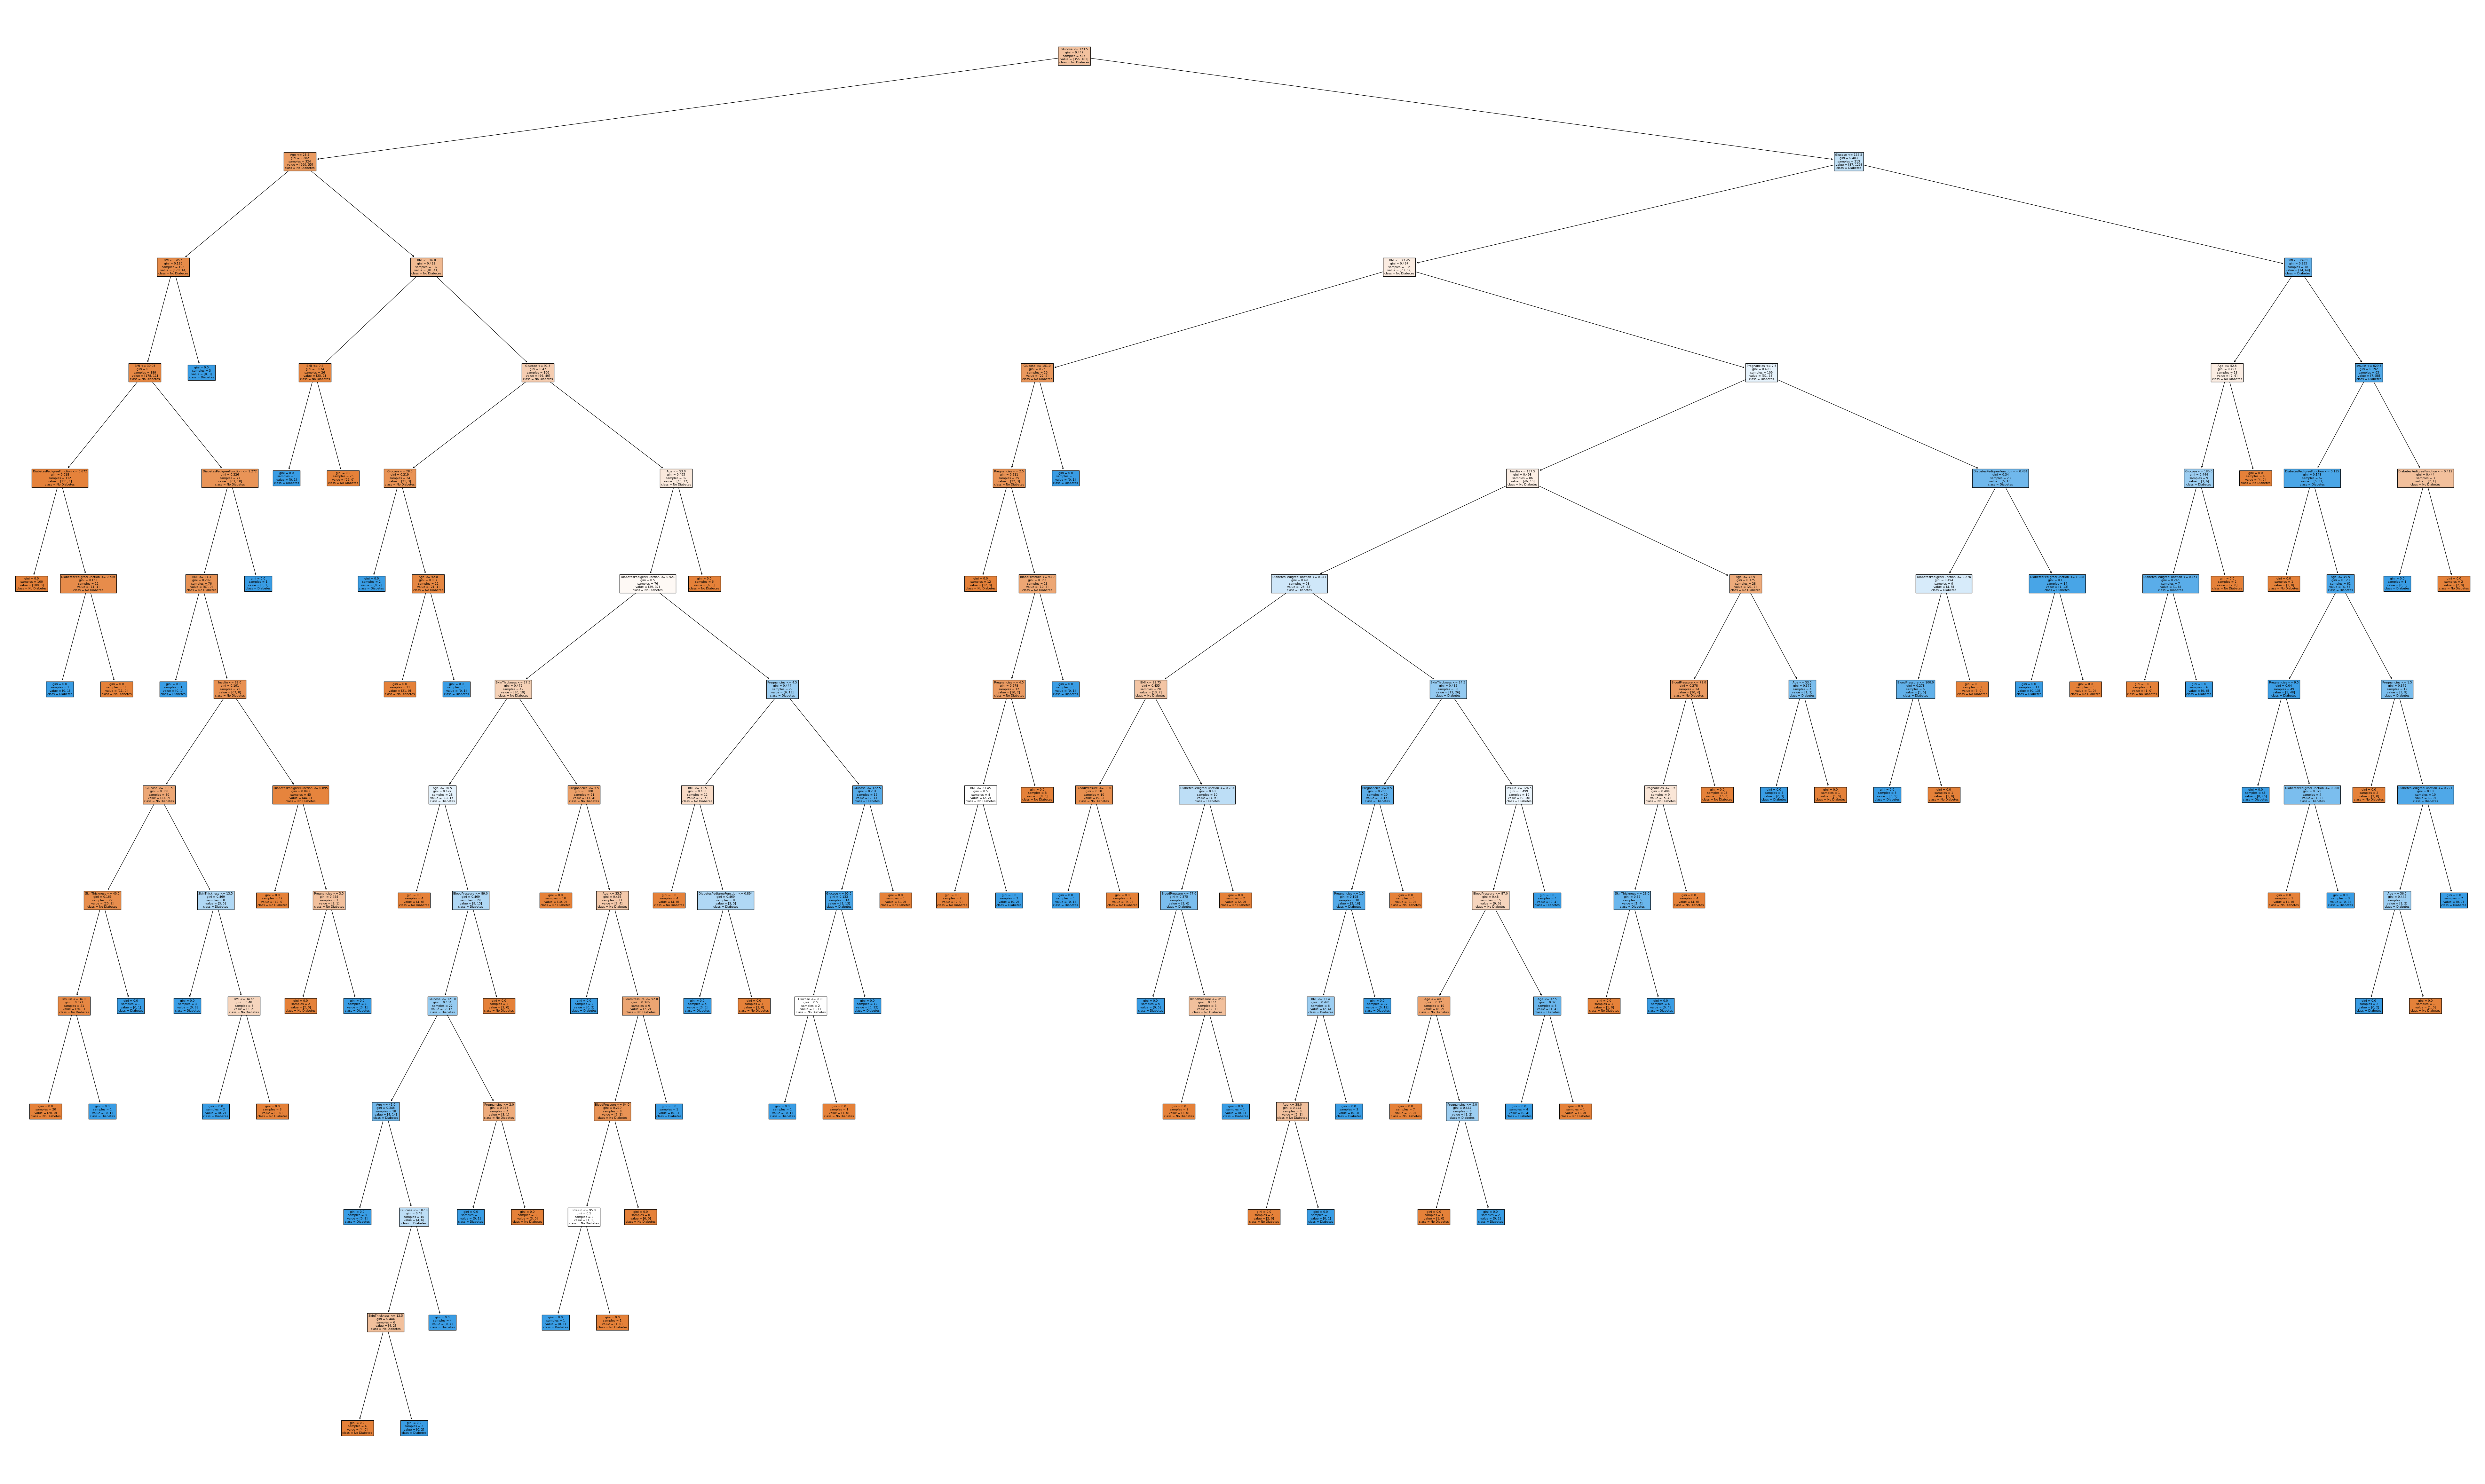

In [49]:
plt.figure(figsize=(100, 60))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()